In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from utils.df_loader import load_adult_df, load_compas_df, load_german_df, load_diabetes_df, load_breast_cancer_df
from utils.preprocessing import preprocess_df,get_columns_type
from sklearn.model_selection import train_test_split
from utils.dice import generate_dice_result, process_results
from utils.models import train_three_models, evaluation_test, save_three_models, load_three_models
from utils.save import save_result_as_csv

pd.options.mode.chained_assignment = None 

print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # False

seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)


TF version:  2.0.0
Eager execution enabled:  True


In [30]:
#### Select dataset ####'

dataset_name = 'german' # [adult, german, compas]

if dataset_name == 'adult':
    dataset_loading_fn = load_adult_df
elif dataset_name == 'german':
    dataset_loading_fn = load_german_df
elif dataset_name == 'compas':
    dataset_loading_fn = load_compas_df
elif dataset_name == 'diabetes':
    dataset_loading_fn = load_diabetes_df
elif dataset_name == 'breast_cancer':
    dataset_loading_fn = load_breast_cancer_df
else:
    raise Exception("Unsupported dataset")

In [31]:
#### Load datafram info.
df_info = preprocess_df(dataset_loading_fn)


In [32]:
### Seperate to train and test set.
train_df, test_df = train_test_split(df_info.dummy_df, train_size=.8, random_state=seed, shuffle=True)

In [33]:
### Get training and testing array.
X_train = np.array(train_df[df_info.ohe_feature_names])
y_train = np.array(train_df[df_info.target_name])
X_test = np.array(test_df[df_info.ohe_feature_names])
y_test = np.array(test_df[df_info.target_name])

In [34]:
### Load models.
models = load_three_models(X_train.shape[-1], dataset_name)

Model: [Decision Tree] | Accuracy: [0.6800] | Precision: [0.4776 | Recall: [0.5246] | F1: [0.5000]


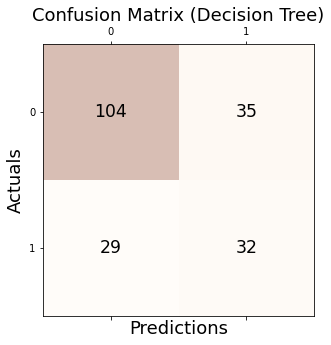

Model: [Random Forest] | Accuracy: [0.7850] | Precision: [0.6957 | Recall: [0.5246] | F1: [0.5981]


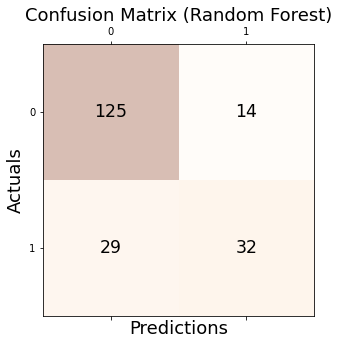

Model: [Neural Network] | Accuracy: [0.7700] | Precision: [0.6230 | Recall: [0.6230] | F1: [0.6230]


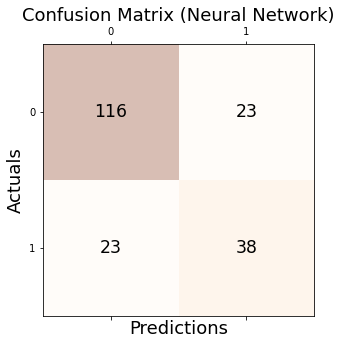

In [35]:
### Print out accuracy on testset.
evaluation_test(models, X_test, y_test)